Novembro Azul: mês mundial de combate ao câncer de próstata.

O câncer de próstata, tipo mais comum entre os homens, é a causa de morte de 28,6% da população masculina que desenvolve neoplasias malignas. No Brasil, um homem morre a cada 38 minutos devido ao câncer de próstata, segundo os dados mais recentes do Instituto Nacional do Câncer (Inca).

O que é a próstata?

É uma glândula do sistema reprodutor masculino, que pesa cerca de 20 gramas, e se assemelha a uma castanha. Ela localiza-se abaixo da bexiga e sua principal função, juntamente com as vesículas seminais, é produzir o esperma.

Sintomas:

Na fase inicial, o câncer de próstata não apresenta sintomas e quando alguns sinais começam a aparecer, cerca de 95% dos tumores já estão em fase avançada, dificultando a cura. Na fase avançada, os sintomas são:

• dor óssea; • dores ao urinar; • vontade de urinar com frequência; • presença de sangue na urina e/ou no sêmen.

Fatores de risco:

• histórico familiar de câncer de próstata: pai, irmão e tio; • raça: homens negros sofrem maior incidência deste tipo de câncer; • obesidade.

Prevenção e tratamento:

A única forma de garantir a cura do câncer de próstata é o diagnóstico precoce. Mesmo na ausência de sintomas, homens a partir dos 45 anos com fatores de risco, ou 50 anos sem estes fatores, devem ir ao urologista para conversar sobre o exame de toque retal, que permite ao médico avaliar alterações da glândula, como endurecimento e presença de nódulos suspeitos, e sobre o exame de sangue PSA (antígeno prostático específico). Cerca de 20% dos pacientes com câncer de próstata são diagnosticados somente pela alteração no toque retal. Outros exames poderão ser solicitados se houver suspeita de câncer de próstata, como as biópsias, que retiram fragmentos da próstata para análise, guiadas pelo ultrassom transretal.

A indicação da melhor forma de tratamento vai depender de vários aspectos, como estado de saúde atual, estadiamento da doença e expectativa de vida. Em casos de tumores de baixa agressividade há a opção da vigilância ativa, na qual periodicamente se faz um monitoramento da evolução da doença intervindo se houver progressão da mesma.

Fontes:

Agência Brasil

Sociedade Brasileira de Urologia

fonte: https://bvsms.saude.gov.br/novembro-azul-mes-mundial-de-combate-ao-cancer-de-prostata/


Sobre o conjunto de dados: https://www.kaggle.com/datasets/sajidsaifi/prostate-cancer
Este é o conjunto de dados de 100 pacientes para implementar o algoritmo de aprendizado de máquina e, assim, interpretar os resultados.

O conjunto de dados é composto por 100 observações e 10 variáveis (das quais 8 variáveis numéricas e uma variável categórica e é ID) que são as seguintes:

Id
1.Radius
2.Texture
3.Perimeter
4.Area
5.Smoothness 6.Compactness

7.diagnosis_result
8.Symmetry
9.Fractal dimension


In [1]:
# importando os pacotes necessários
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import pycaret

#Carregando os dados
df = pd.read_csv('Prostate_Cancer.csv')
# visualizar as 10 primeiras entradas
df.head(10)



,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [2]:
#removendo a coluna 'id' do DataFrame (df)
df = df.drop(['id'], axis=1)

In [3]:
#exibindo as primeiras 10 linhas do DataFrame (df)
df.head(10)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,B,25,25,83,477,0.128,0.170,0.209,0.076
6,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,M,15,18,90,578,0.119,0.165,0.220,0.075
8,M,19,24,88,520,0.127,0.193,0.235,0.074
9,M,25,11,84,476,0.119,0.240,0.203,0.082


In [4]:
#renomeando colunas
df.columns = [ 'Resultado_Diagnóstico', 'Raio', 'Textura', 'Perímetro','Área', 'Suavidade', 'Compacidade', 'Simetria', 'Dimensão_Fractal']

In [5]:
#exibindo as primeiras 10 linhas do DataFrame (df)
df.head(10)

,Resultado_Diagnóstico,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão_Fractal
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,B,25,25,83,477,0.128,0.170,0.209,0.076
6,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,M,15,18,90,578,0.119,0.165,0.220,0.075
8,M,19,24,88,520,0.127,0.193,0.235,0.074
9,M,25,11,84,476,0.119,0.240,0.203,0.082


In [6]:
#substituindo as ocorrências de 'M' por 'Maligno' e 'B' por 'Benigno'.
df['Resultado_Diagnóstico'] = df['Resultado_Diagnóstico'].map({'M': 'Maligno', 'B': 'Benigno'})

In [7]:
#exibindo as primeiras 10 linhas do DataFrame (df)
df.head(10)

,Resultado_Diagnóstico,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão_Fractal
0,Maligno,23,12,151,954,0.143,0.278,0.242,0.079
1,Benigno,9,13,133,1326,0.143,0.079,0.181,0.057
2,Maligno,21,27,130,1203,0.125,0.160,0.207,0.060
3,Maligno,14,16,78,386,0.070,0.284,0.260,0.097
4,Maligno,9,19,135,1297,0.141,0.133,0.181,0.059
5,Benigno,25,25,83,477,0.128,0.170,0.209,0.076
6,Maligno,16,26,120,1040,0.095,0.109,0.179,0.057
7,Maligno,15,18,90,578,0.119,0.165,0.220,0.075
8,Maligno,19,24,88,520,0.127,0.193,0.235,0.074
9,Maligno,25,11,84,476,0.119,0.240,0.203,0.082


Descritiva básica univariada

In [8]:
#a base quanto ao número de linhas e colunas
print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

DIMENSÕES DO DATAFRAME:
Linhas:  100
Colunas:  9


In [9]:
#número de entradas (linhas) e colunas no DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Resultado_Diagnóstico  100 non-null    object 
 1   Raio                   100 non-null    int64  
 2   Textura                100 non-null    int64  
 3   Perímetro              100 non-null    int64  
 4   Área                   100 non-null    int64  
 5   Suavidade              100 non-null    float64
 6   Compacidade            100 non-null    float64
 7   Simetria               100 non-null    float64
 8   Dimensão_Fractal       100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


Resumo Estatístico dos Dados

In [10]:
#gerando estatísticas descritivas para o DataFrame, como média, desvio padrão e quartis.
df.describe()

,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão_Fractal
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [11]:
#contando a quantidade de valores nulos em cada coluna do DataFrame.
df.isnull().sum()

Resultado_Diagnóstico    0
Raio                     0
Textura                  0
Perímetro                0
Área                     0
Suavidade                0
Compacidade              0
Simetria                 0
Dimensão_Fractal         0
dtype: int64

In [12]:
#imprimindo os valores únicos do DataFrame, ordenados de forma crescente de acordo com a contagem de valores únicos 
#em cada coluna.
print('VALORES ÚNICOS: \n')
print(df.nunique().sort_values())

VALORES ÚNICOS: 

Resultado_Diagnóstico     2
Raio                     16
Textura                  17
Dimensão_Fractal         32
Suavidade                45
Perímetro                55
Simetria                 64
Compacidade              85
Área                     95
dtype: int64


Mapa de Correlação Entre Variáveis

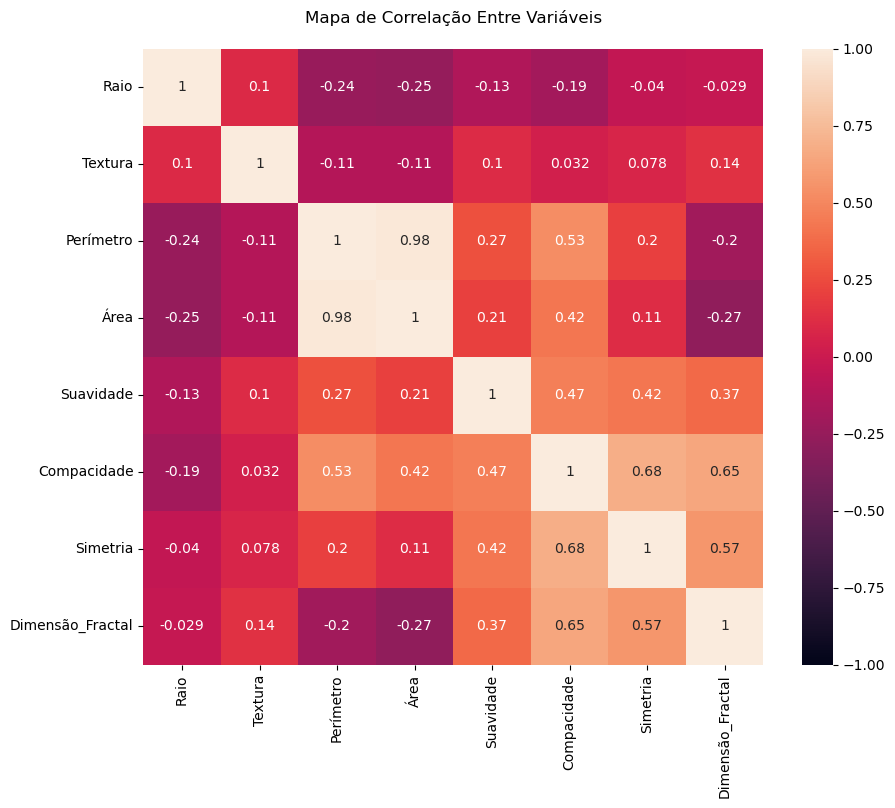

In [13]:
#calculando a matriz de correlação das variáveis em um DataFrame (df)
corr = df.corr()
#Cria uma figura para o gráfico com o tamanho especificado de 10 polegadas de largura por 8 polegadas de altura.
plt.figure(figsize=(10, 8))
#Define o título do gráfico como "Mapa de Correlação Entre Variáveis".
plt.title('Mapa de Correlação Entre Variáveis\n')
#criando um mapa de calor (heatmap) para visualizar as correlações entre essas variáveis.
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

Histograma das Variáveis

array([[<Axes: title={'center': 'Raio'}>,
        <Axes: title={'center': 'Textura'}>,
        <Axes: title={'center': 'Perímetro'}>],
       [<Axes: title={'center': 'Área'}>,
        <Axes: title={'center': 'Suavidade'}>,
        <Axes: title={'center': 'Compacidade'}>],
       [<Axes: title={'center': 'Simetria'}>,
        <Axes: title={'center': 'Dimensão_Fractal'}>, <Axes: >]],
      dtype=object)

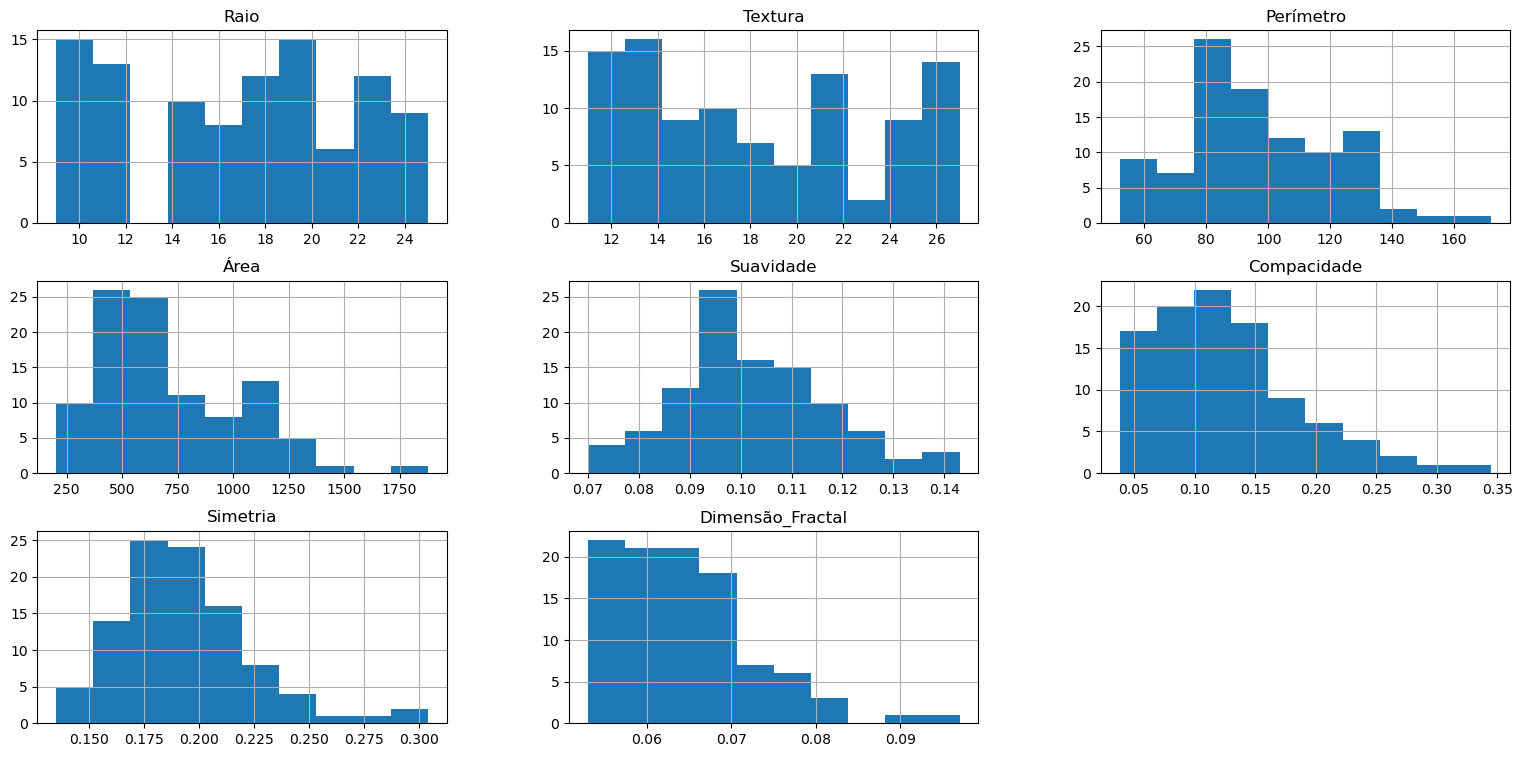

In [14]:
#criando um histograma para todas as colunas numéricas de um DataFrame (df).
df.hist(figsize=(19,9))

Quantidade de Diagnósticos

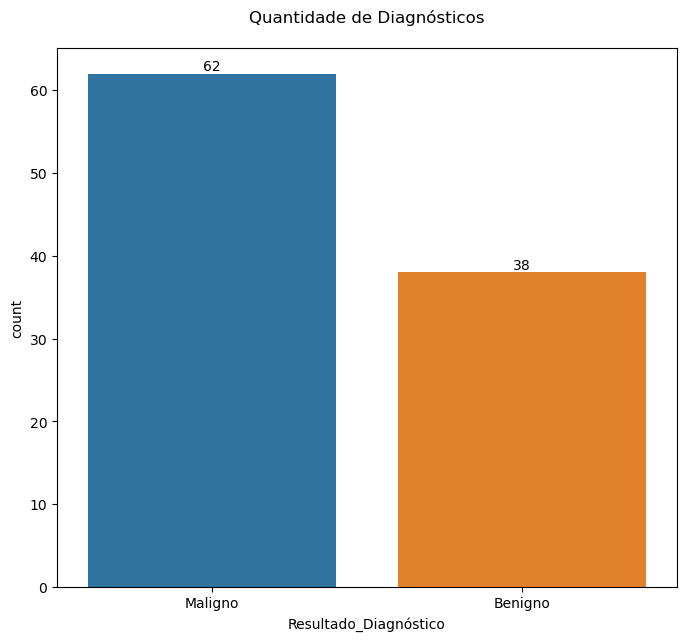

In [15]:
plt.figure(figsize=(8,7))
ax = sns.countplot(data=df, x='Resultado_Diagnóstico')
ax.set_title('Quantidade de Diagnósticos\n')
ax.bar_label(ax.containers[0]);

Visualização da Combinação das Variáveis

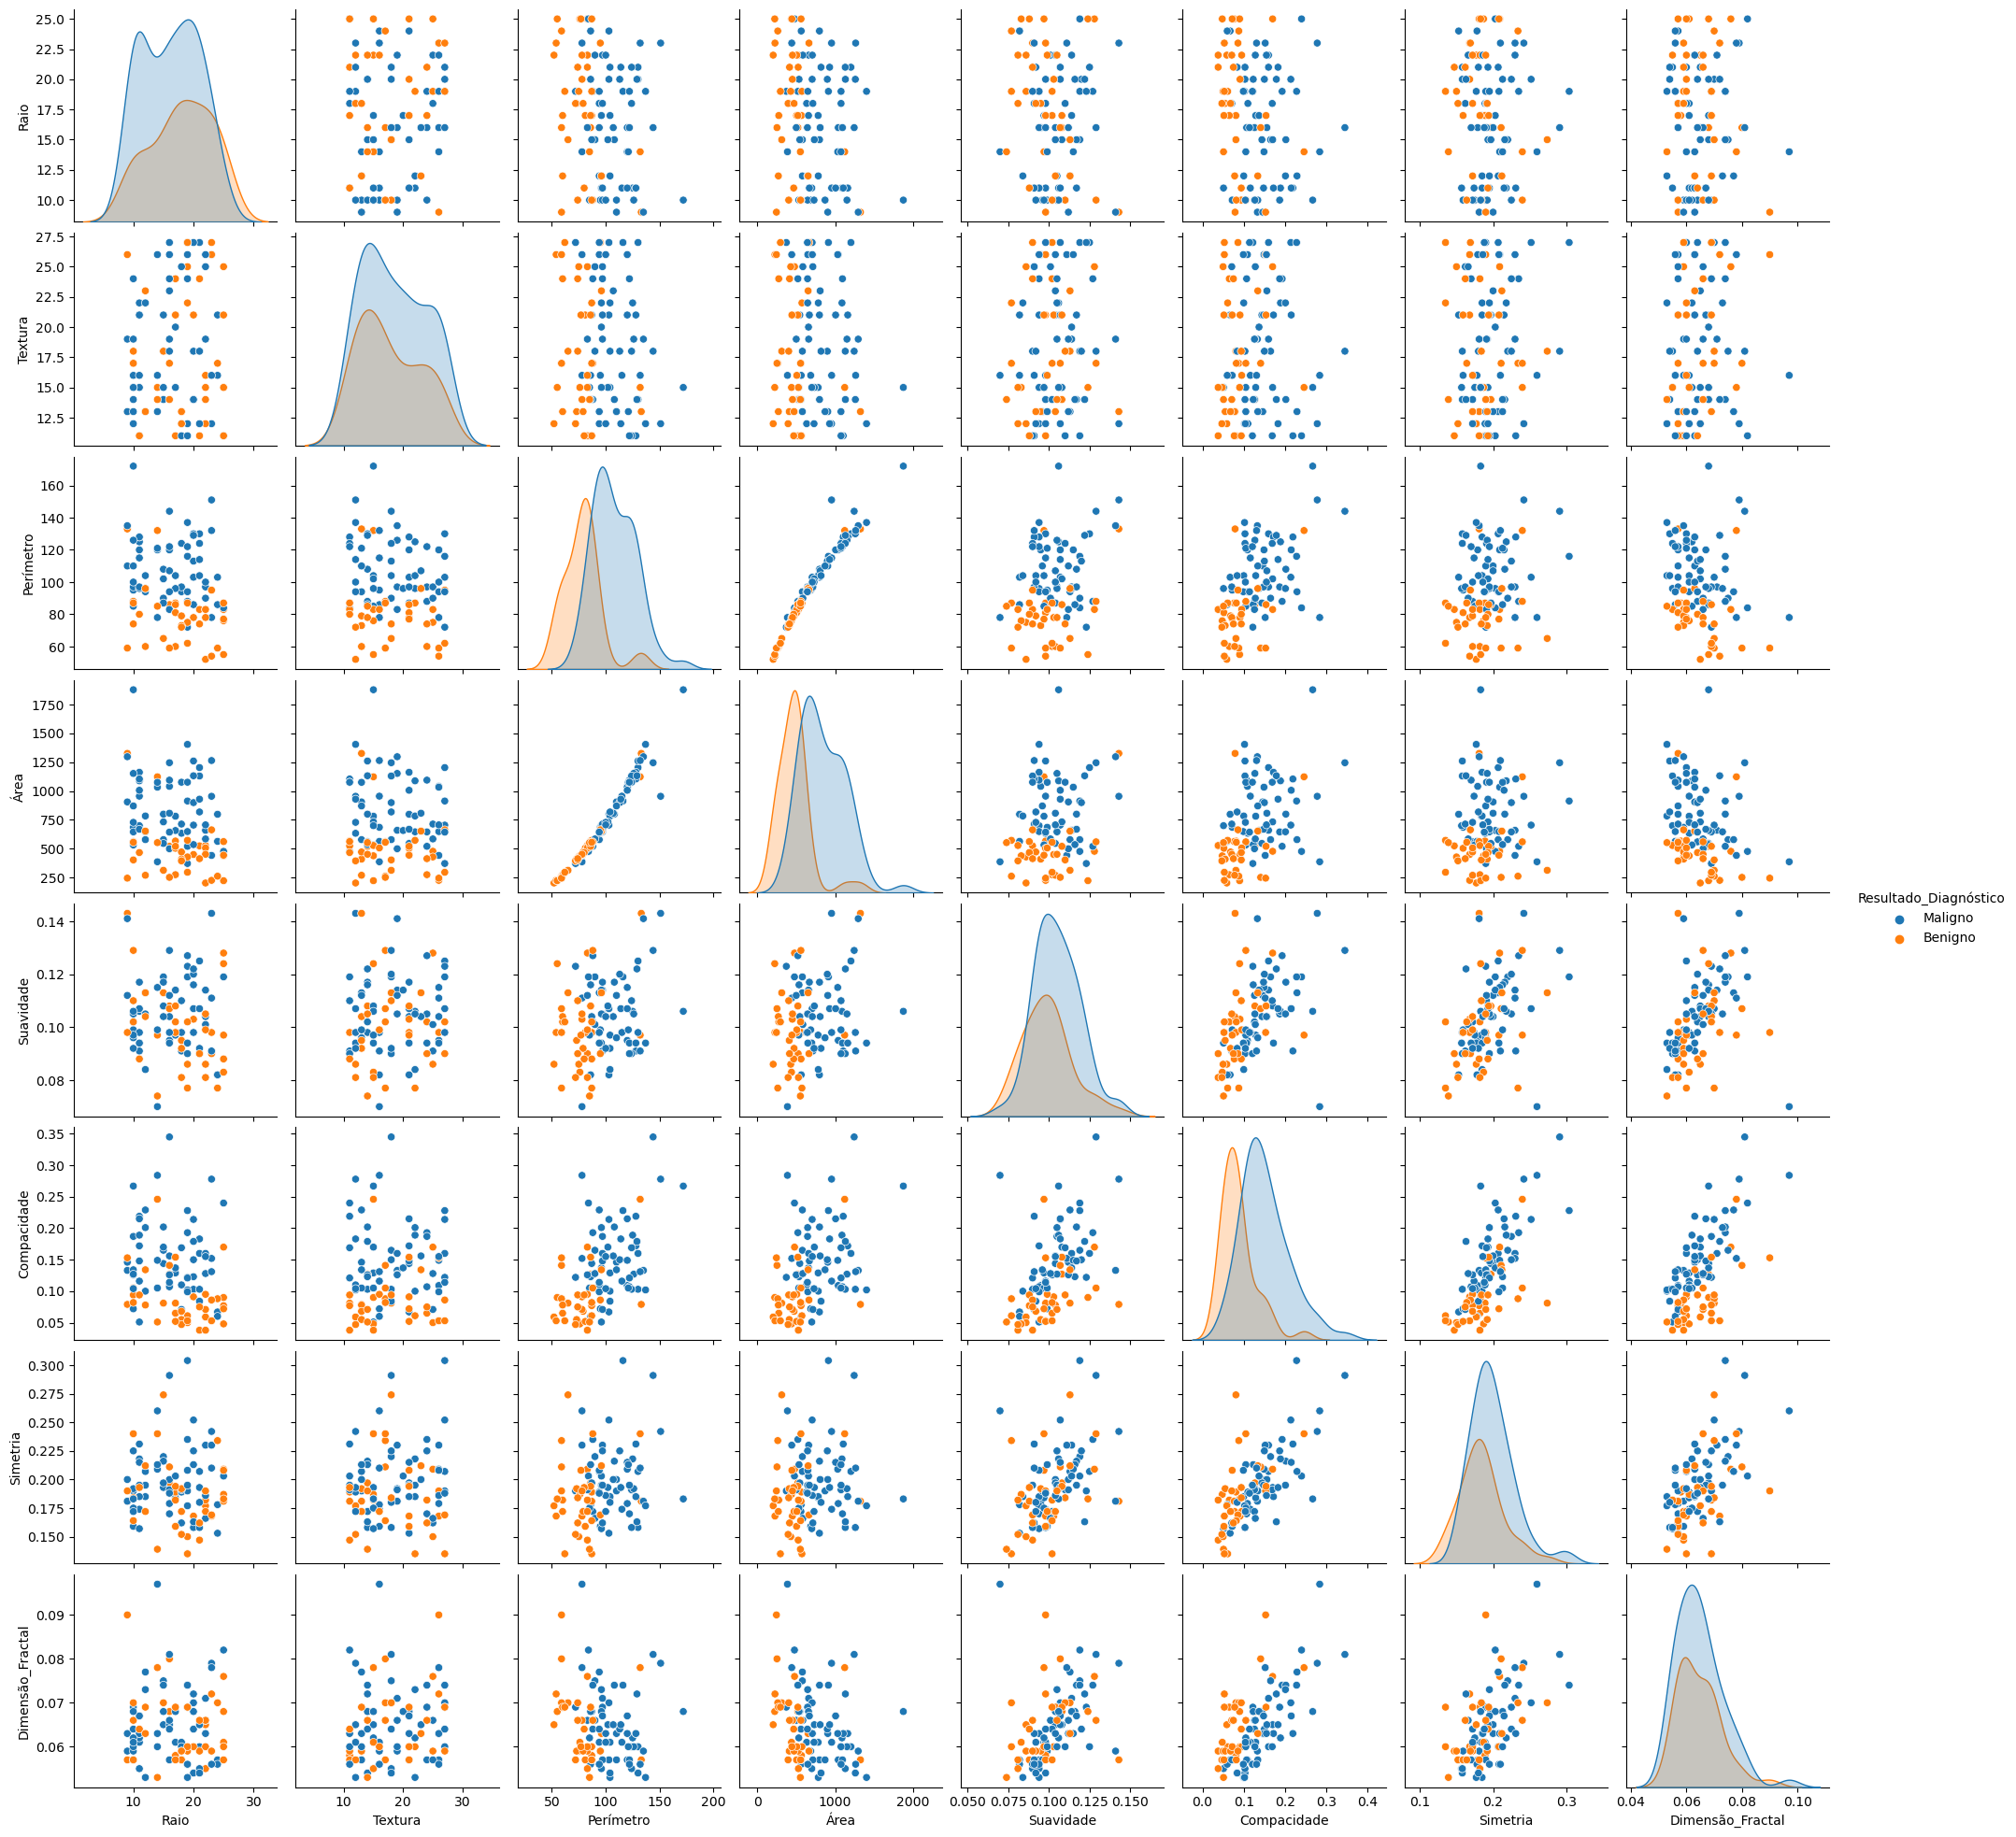

In [16]:
#criando um pairplot (gráfico de pares) com base no DataFrame df
sns.pairplot(df, hue='Resultado_Diagnóstico')

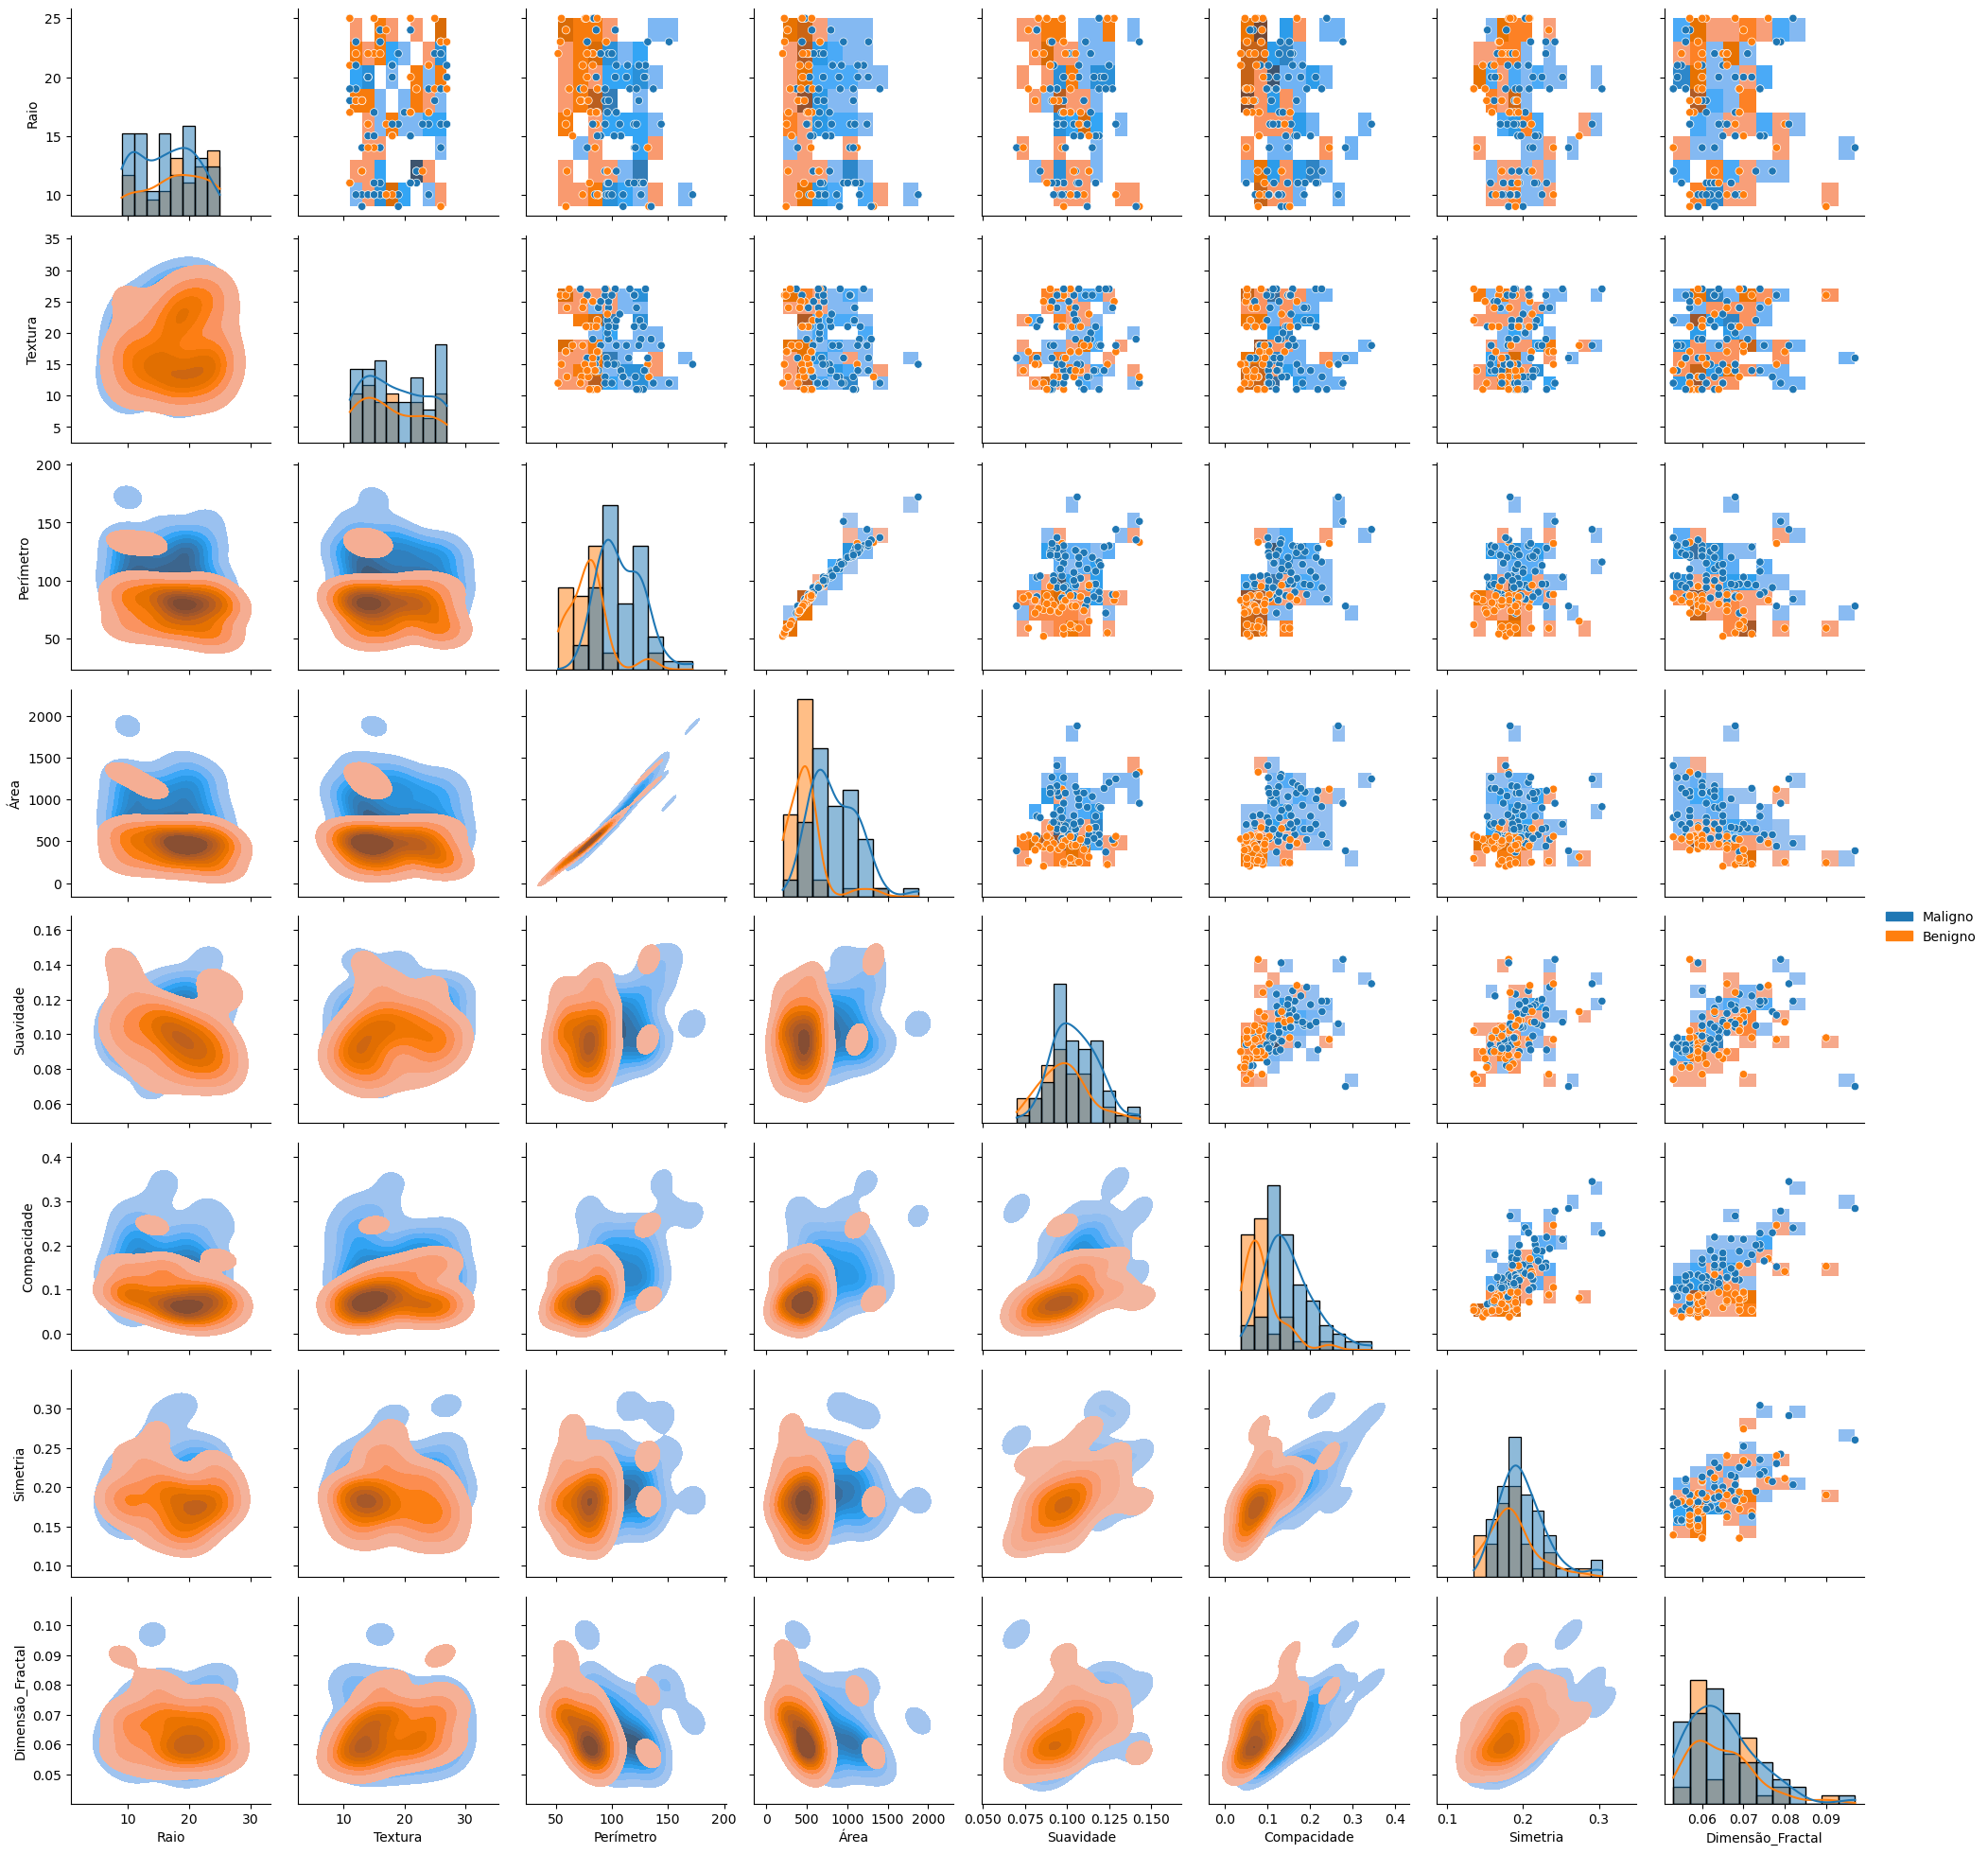

In [17]:
#criando um conjunto de gráficos de pares (PairGrid) 
g = sns.PairGrid(df, hue='Resultado_Diagnóstico')
#está sendo mapeado um gráfico de dispersão (scatterplot), 
#abaixo da diagonal principal está sendo mapeada uma estimativa de densidade kernel (kdeplot)
#preenchida, e na diagonal principal estão sendo mapeados histogramas (histplot) com densidades 
#suavizadas.
g.map_upper(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
g.add_legend(title="", adjust_subtitles=True)

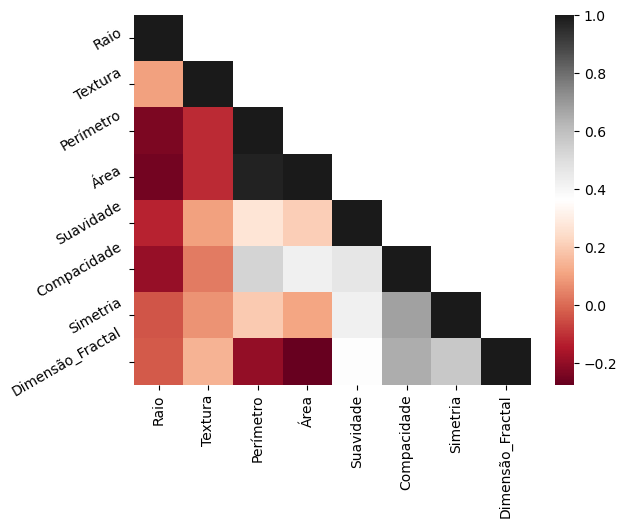

In [18]:
#criando uma máscara para ocultar a metade superior da matriz de correlação, em seguida,
#exibindo a matriz de correlação como um heatmap e ajustando as etiquetas do eixo x e y para melhor visualização.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, cmap='RdGy')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Preparação dos Dados

In [42]:
df.head()

,Resultado_Diagnóstico,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão_Fractal
0,Maligno,23,12,151,954,0.143,0.278,0.242,0.079
1,Benigno,9,13,133,1326,0.143,0.079,0.181,0.057
2,Maligno,21,27,130,1203,0.125,0.160,0.207,0.060
3,Maligno,14,16,78,386,0.070,0.284,0.260,0.097
4,Maligno,9,19,135,1297,0.141,0.133,0.181,0.059


In [48]:
#separar as variáveis explicativas da variável dependente
#usando a função drop do Pandas para remover as colunas 'id' e 'diagnosis' do DataFrame, 
#armazenando o resultado em X, e atribuindo a coluna 'diagnosis' a Y.

X = df.drop(['Resultado_Diagnóstico'], axis=1)
y = df['Resultado_Diagnóstico']

In [49]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()

metadados

,dtype,valores_unicos
Resultado_Diagnóstico,object,2
Raio,int64,16
Textura,int64,17
Perímetro,int64,55
Área,int64,95
Suavidade,float64,45
Compacidade,float64,85
Simetria,float64,64
Dimensão_Fractal,float64,32


In [50]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [51]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()
metadados['variavel'] = 'covariavel'
metadados.loc['mau','variavel'] = 'resposta'
metadados.loc['bom','variavel'] = 'resposta'
metadados

,dtype,valores_unicos,variavel
Resultado_Diagnóstico,object,2.0,covariavel
Raio,int64,16.0,covariavel
Textura,int64,17.0,covariavel
Perímetro,int64,55.0,covariavel
Área,int64,95.0,covariavel
Suavidade,float64,45.0,covariavel
Compacidade,float64,85.0,covariavel
Simetria,float64,64.0,covariavel
Dimensão_Fractal,float64,32.0,covariavel
mau,NaN,NaN,resposta


In [52]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

Criando um pipeline utilizando o sklearn pipeline para o preprocessamento

In [53]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from pycaret.regression import create_model

X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)

In [54]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [55]:
X_digits.shape

(1797, 64)

Dataset de treino

In [56]:
# "Fitando" e aplicando Z score nos dados de treino
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [57]:
# "Fitando" e aplicando o pca nos dados de treino
pca.fit(X_train)
X_train = pca.transform(X_train)

In [58]:
# "Fitando" e predizendo uma regressão logística nos dados de treino
logistic.fit(X_train, y_train)

logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

Dataset de teste

In [59]:
# Aplicando nos dados de teste o Z score "fitado" nos dados de treino  
X_test = scaler.transform(X_test)

In [60]:
# Aplicando nos dados de teste o PCA "fitado" nos dados de treino  
X_test = pca.transform(X_test)

In [61]:
# Predizendo nos dados de teste o modelo "fitado" nos dados de treino
logistic.predict(X_test)

array([5, 2, 5, 4, 8, 3, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 9, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 3, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 5, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

Usando pipeline

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)

In [63]:
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])

Analisando o objeto

In [64]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

Dados de treino

In [65]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=15)),
                ('logistic', LogisticRegression(max_iter=200))])

In [66]:
pipe.predict(X_train)

array([0, 0, 0, ..., 1, 8, 2])

Dados de teste

In [67]:
pipe.predict(X_test)

array([5, 2, 5, 4, 8, 1, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 8, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 9, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 8, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 0, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [68]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [69]:
pipe[0]

StandardScaler()

In [70]:
pipe[1]

PCA(n_components=15)

In [71]:
pipe[2]

LogisticRegression(max_iter=200)

In [72]:
pipe[1].transform(X_train)

array([[  0.87096766, -12.61614248, -18.95654457, ...,   5.10372394,
         15.93371134,   3.87709388],
       [  7.38997231,  -7.84615105, -16.49112291, ...,   8.43866867,
         19.88482686,   2.82006489],
       [  8.28995231, -10.02852051, -14.17210211, ...,   8.96829937,
         27.21010446,   4.1483745 ],
       ...,
       [-12.90638992, -12.7703575 ,  16.69126349, ...,   1.55102176,
         10.25662165,   6.5871021 ],
       [-12.20195001,  -2.58803858,   7.0075077 , ...,   8.60857753,
          9.90535844,   2.93700642],
       [-11.2146392 ,   2.61288774,   2.68241994, ...,   3.98598057,
         18.61315922,  -4.6972563 ]])

In [73]:
pca_pipe.transform(X_train)

array([[  0.87096766, -12.61614248, -18.95654457, ...,   5.10372394,
         15.93371134,   3.87709388],
       [  7.38997231,  -7.84615105, -16.49112291, ...,   8.43866867,
         19.88482686,   2.82006489],
       [  8.28995231, -10.02852051, -14.17210211, ...,   8.96829937,
         27.21010446,   4.1483745 ],
       ...,
       [-12.90638992, -12.7703575 ,  16.69126349, ...,   1.55102176,
         10.25662165,   6.5871021 ],
       [-12.20195001,  -2.58803858,   7.0075077 , ...,   8.60857753,
          9.90535844,   2.93700642],
       [-11.2146392 ,   2.61288774,   2.68241994, ...,   3.98598057,
         18.61315922,  -4.6972563 ]])

In [75]:
#Aplicando o get_dummies() para transformar colunas catégoricas do dataframe em colunas de 0 e 1
dummy = pd.get_dummies(df, columns=['Resultado_Diagnóstico'])

In [76]:
dummy

,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão_Fractal,Resultado_Diagnóstico_Benigno,Resultado_Diagnóstico_Maligno
0,23,12,151,954,0.143,0.278,0.242,0.079,0,1
1,9,13,133,1326,0.143,0.079,0.181,0.057,1,0
2,21,27,130,1203,0.125,0.160,0.207,0.060,0,1
3,14,16,78,386,0.070,0.284,0.260,0.097,0,1
4,9,19,135,1297,0.141,0.133,0.181,0.059,0,1
...,...,...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056,0,1
96,22,14,78,451,0.105,0.071,0.190,0.066,1,0
97,19,27,62,295,0.102,0.053,0.135,0.069,1,0
98,21,24,74,413,0.090,0.075,0.162,0.066,1,0


In [77]:
dummy.dtypes

Raio                               int64
Textura                            int64
Perímetro                          int64
Área                               int64
Suavidade                        float64
Compacidade                      float64
Simetria                         float64
Dimensão_Fractal                 float64
Resultado_Diagnóstico_Benigno      uint8
Resultado_Diagnóstico_Maligno      uint8
dtype: object

In [81]:
#utilizando o pycaret para pre processar os dados e rodar o modelo xgboost. 
import pandas as pd
from pycaret.classification import *
df = pd.read_csv('Prostate_Cancer.csv')
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [82]:
#removendo a coluna 'id' do DataFrame (df)
df = df.drop(['id'], axis=1)
#renomeando colunas
df.columns = [ 'Resultado_Diagnóstico', 'Raio', 'Textura', 'Perímetro','Área', 'Suavidade', 'Compacidade', 'Simetria', 'Dimensão_Fractal']
#substituindo as ocorrências de 'M' por 'Maligno' e 'B' por 'Benigno'.
df['Resultado_Diagnóstico'] = df['Resultado_Diagnóstico'].map({'M': 'Maligno', 'B': 'Benigno'})

In [83]:
df.head()

,Resultado_Diagnóstico,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão_Fractal
0,Maligno,23,12,151,954,0.143,0.278,0.242,0.079
1,Benigno,9,13,133,1326,0.143,0.079,0.181,0.057
2,Maligno,21,27,130,1203,0.125,0.160,0.207,0.060
3,Maligno,14,16,78,386,0.070,0.284,0.260,0.097
4,Maligno,9,19,135,1297,0.141,0.133,0.181,0.059


In [84]:
dataset = df.sample()

In [85]:
df.columns

Index(['Resultado_Diagnóstico', 'Raio', 'Textura', 'Perímetro', 'Área',
       'Suavidade', 'Compacidade', 'Simetria', 'Dimensão_Fractal'],
      dtype='object')

In [86]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (1, 9)
Conjunto de dados não usados no treino/teste, apenas como validação: (0, 9)


Alterando os dados de treino

In [87]:
from pycaret.classification import *

In [88]:
data.dtypes

Resultado_Diagnóstico     object
Raio                       int64
Textura                    int64
Perímetro                  int64
Área                       int64
Suavidade                float64
Compacidade              float64
Simetria                 float64
Dimensão_Fractal         float64
dtype: object

In [89]:
data.corr()

,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão_Fractal
Raio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Textura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Perímetro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Área,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suavidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compacidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Simetria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dimensão_Fractal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
exp = setup(data = df, target = 'Resultado_Diagnóstico', experiment_name='Câncer de Próstata',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)

,Description,Value
0,Session id,339
1,Target,Resultado_Diagnóstico
2,Target type,Binary
3,Target mapping,"Benigno: 0, Maligno: 1"
4,Original data shape,"(100, 9)"
5,Transformed data shape,"(116, 9)"
6,Transformed train set shape,"(86, 9)"
7,Transformed test set shape,"(30, 9)"
8,Numeric features,8
9,Preprocess,True


In [92]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8170,0.9466,0.8409,0.8576,0.8419,0.6214,0.6378,1.3000
lr,Logistic Regression,0.9011,0.9447,0.8841,0.9542,0.9153,0.7958,0.8054,4.8900
et,Extra Trees Classifier,0.9011,0.9372,0.9318,0.9199,0.9216,0.7848,0.7984,0.4150
rf,Random Forest Classifier,0.8864,0.9264,0.9318,0.8971,0.9097,0.7538,0.7690,0.3000
xgboost,Extreme Gradient Boosting,0.8301,0.9187,0.8614,0.8740,0.8603,0.6383,0.6562,0.1700
nb,Naive Bayes,0.8162,0.9182,0.8159,0.8806,0.8447,0.6164,0.6236,0.0850
ada,Ada Boost Classifier,0.8162,0.8905,0.8386,0.8598,0.8429,0.6172,0.6312,0.1900
lda,Linear Discriminant Analysis,0.8709,0.8879,0.9295,0.8706,0.8980,0.7204,0.7290,0.0775
knn,K Neighbors Classifier,0.8301,0.8793,0.8364,0.8865,0.8562,0.6443,0.6589,0.1650
gbc,Gradient Boosting Classifier,0.8162,0.8680,0.8364,0.8661,0.8464,0.6128,0.6264,0.1425


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

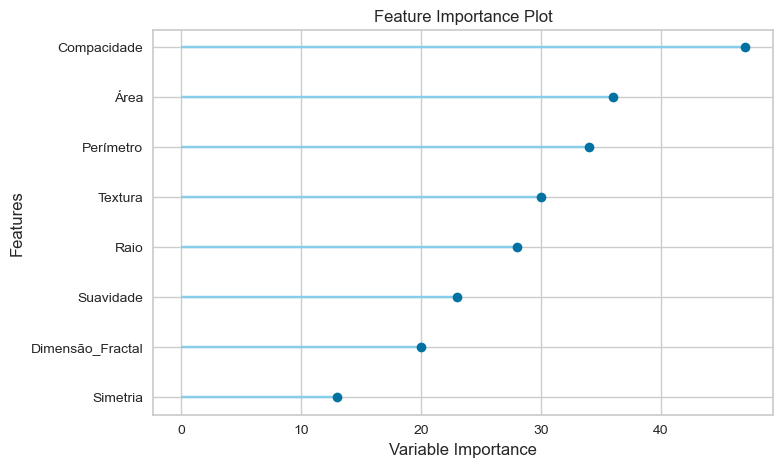

In [93]:
plot_model(best_model, plot='feature')

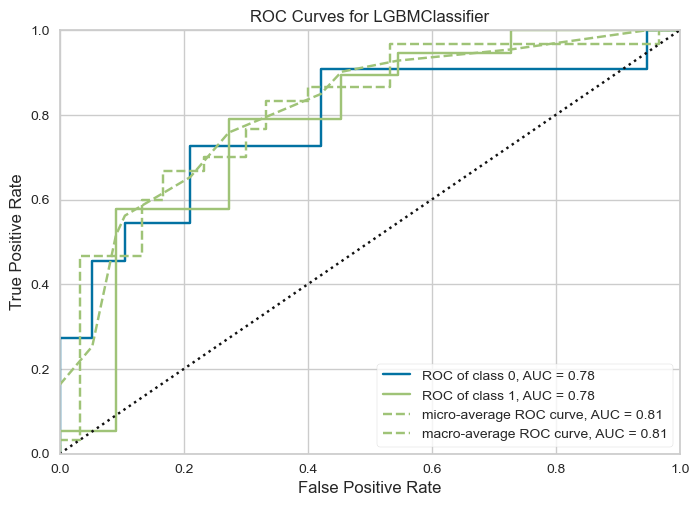

In [94]:
plot_model(best_model, plot='auc')

In [95]:
save_model(best_model,'lightgbm 24 de abril de 2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Raio', 'Textura', 'Perímetro',
                                              'Área', 'Suavidade', 'Compacidade',
                                              'Simetria', 'Dimensão_Fractal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weig

In [96]:
model_saved = load_model('lightgbm 24 de abril de 2024')

Transformation Pipeline and Model Successfully Loaded


In [99]:
model_saved.named_steps

{'label_encoding': TransformerWrapperWithInverse(exclude=None, include=None,
                               transformer=LabelEncoder()),
 'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['Raio', 'Textura', 'Perímetro', 'Área', 'Suavidade',
                             'Compacidade', 'Simetria', 'Dimensão_Fractal'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              keep_empty_features=False,
                                              missing_values=nan,
                                              strategy='mean',
                                              verbose='deprecated')),
 'categorical_imputer': TransformerWrapper(exclude=None, include=[],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                          

In [98]:
lightgbm = create_model('lightgbm')
#Classificação usando lightgbm
tuned_lightgbm = tune_model(lightgbm)
#Finalizando o modelo para deploy
final_lightgbm = finalize_model(tuned_lightgbm)
evaluate_model(final_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.6667,0.7500,0.7500,0.7500,0.4167,0.4167
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8571,1.0000,0.7500,1.0000,0.8571,0.7200,0.7500
4,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
5,0.8571,0.9167,0.7500,1.0000,0.8571,0.7200,0.7500
6,0.8571,0.9167,0.7500,1.0000,0.8571,0.7200,0.7500
7,0.8571,0.9000,1.0000,0.8333,0.9091,0.5882,0.6455
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.4286,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.4286,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.4286,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.4286,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.4286,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.4286,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.2857,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.2857,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

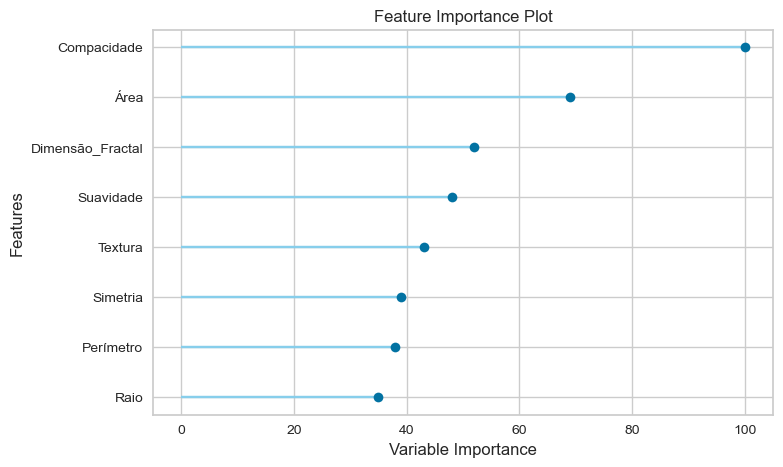

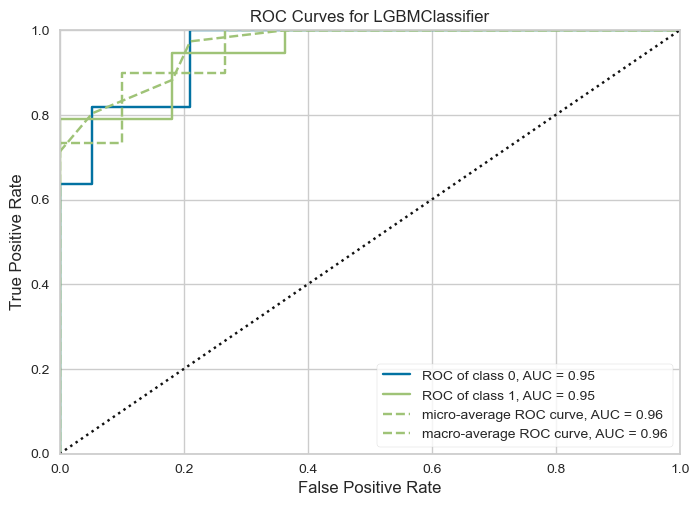

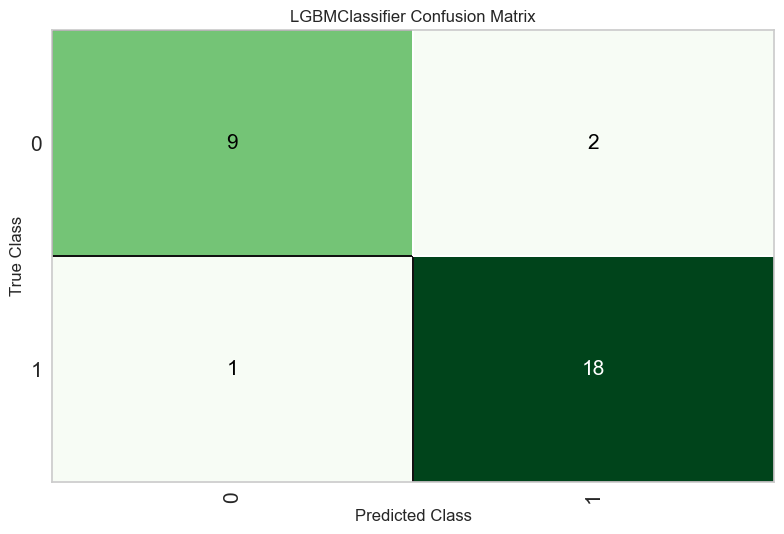

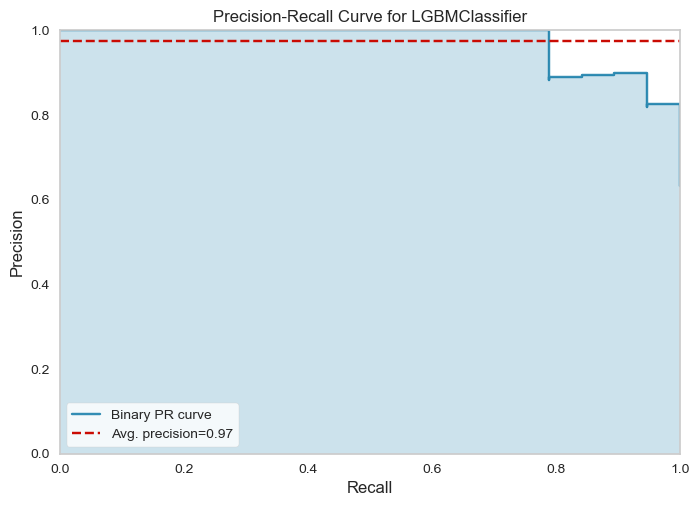

In [100]:
#Finalizando o modelo para deploy
#Importância das variáveis (Feature Importance) Plot
plot_model(final_lightgbm, plot='feature')
# AUC Plot
plot_model(final_lightgbm, plot='auc')
#Matriz de confusão (Confusion matrix)
plot_model(final_lightgbm, plot='confusion_matrix')
#Precision-Recall Plot
plot_model(final_lightgbm, plot='pr')

In [101]:
#Predict na amostra de test / hold-out
predict_model(final_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9000,0.9522,0.9000,0.9000,0.8989,0.7805,0.7826


,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão_Fractal,Resultado_Diagnóstico,prediction_label,prediction_score
12,14,15,132,1123,0.097,0.246,0.240,0.078,0,Maligno,0.7471
44,10,15,85,532,0.097,0.105,0.175,0.062,1,Benigno,0.7858
41,19,27,72,371,0.123,0.122,0.190,0.069,1,Maligno,0.5955
87,19,11,122,1076,0.090,0.121,0.195,0.056,1,Maligno,0.9640
27,16,24,122,1094,0.094,0.107,0.170,0.057,1,Maligno,0.9808
61,25,15,55,222,0.124,0.090,0.183,0.068,0,Benigno,0.9821
29,11,16,115,955,0.098,0.116,0.174,0.061,1,Maligno,0.9673
3,14,16,78,386,0.070,0.284,0.260,0.097,1,Maligno,0.6994
11,17,15,104,781,0.097,0.129,0.184,0.061,1,Maligno,0.9947
10,24,21,103,798,0.082,0.067,0.153,0.057,1,Maligno,0.8654


In [102]:
#Finalizando o modelo para deploy
final_lgt = finalize_model(final_lightgbm)

In [103]:
#Parâmetros finais do modelo para deploy
print(final_lgt)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Raio', 'Textura', 'Perímetro',
                                             'Área', 'Suavidade', 'Compacidade',
                                             'Simetria', 'Dimensão_Fractal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              c...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
     

In [104]:
predict_model(final_lgt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9000,0.9522,0.9000,0.9000,0.8989,0.7805,0.7826


In [105]:
#Salvando o modelo final
save_model(final_lgt,'Final lightgbm Model 24 de Abril de 2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Raio', 'Textura', 'Perímetro',
                                              'Área', 'Suavidade', 'Compacidade',
                                              'Simetria', 'Dimensão_Fractal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weig

In [106]:
#Carregando o modelo salvo
saved_final_próstata = load_model('Final lightgbm Model 24 de Abril de 2024')

Transformation Pipeline and Model Successfully Loaded
